### Dado a equação de onda: $\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$
### Assumimos o ansatz: $u(x,t) = \phi(x) e^{i \omega t}$
### Substituindo na equação de ondas: $\frac{\partial^2}{\partial t^2} \left( \phi(x) e^{i \omega t} \right) = c^2 \frac{\partial^2}{\partial x^2} \left( \phi(x) e^{i \omega t} \right)$
### Calculando as derivadas parciais:$ - \omega^2 \phi(x) e^{i \omega t} = c^2 \phi''(x) e^{i \omega t}$
### Reorganizando: $\phi''(x) + \left( \frac{\omega^2}{c^2} \right) \phi(x) = 0$
### Definindo $( k^2 = \frac{\omega^2}{c^2} )$, obtemos: $\phi''(x) + k^2 \phi(x) = 0$
### A equação possui como solução geral: $\phi(x) = A \sin(kx) + B \cos(kx)$
### Aplicando as condições de contorno: $(\phi(0) = 0 \Rightarrow B = 0 )$ e $(\phi(L) = 0 \Rightarrow \sin(kL) = 0 \Rightarrow kL = n\pi \Rightarrow k = \frac{n\pi}{L})$
### Portanto, os autovalores são: \omega_n = c k = \frac{n \pi c}{L}
### E os autovetores (modos normais) são: $\phi_n(x) = A_n \sin\left( \frac{n \pi x}{L} \right)$





In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh 

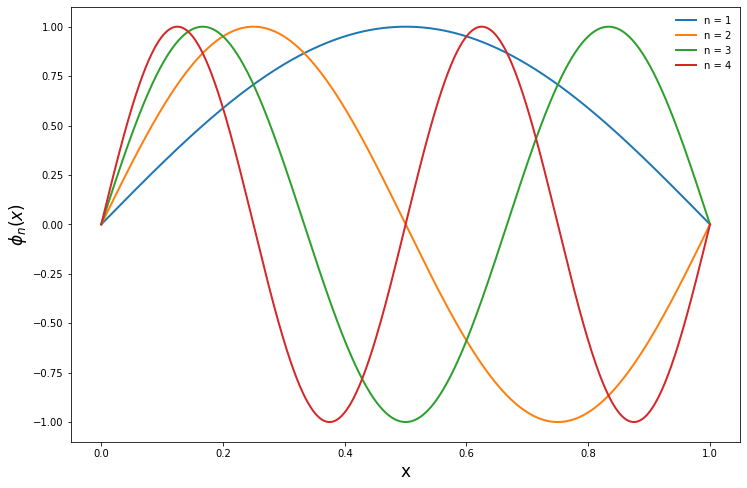

In [41]:
"""
Este script plota as funções modais de uma corda vibrante com condições de contorno fixas, 
com base na equação das ondas para diferentes modos de vibração.

Parâmetros:
- L : Comprimento da corda.
- c : Velocidade da onda.
- n_max : Número máximo de modos a serem exibidos.
- x : Discretização do espaço da corda, dividida em 1000 pontos entre 0 e L.

O script gera um gráfico onde cada linha representa uma função modal $\phi_n(x)$, 
associada a um modo de vibração específico (n = 1, 2, 3, ..., n_max), utilizando 
uma fórmula senoidal com a condição de contorno de uma corda fixa nas extremidades.

O gráfico resultante exibe a posição `x` no eixo horizontal e a função de onda $\phi_n(x)$ no eixo vertical.


"""

L = 1.0       # comprimento da corda
c = 1.0       # velocidade da onda
n_max = 4     # número de modos a mostrar
x = np.linspace(0, L, 1000)


plt.figure(figsize=(12, 8))


for n in range(1, n_max + 1):
    phi_n = np.sin(n * np.pi * x / L)
    plt.plot(x, phi_n, label=f'n = {n}',linewidth=2.0)


plt.xlabel('x',size=17)
plt.ylabel(r'$\phi_n(x)$',size=17)
plt.legend(frameon=False)
plt.show()

### A equação de ondas unidimensional é dada por: $\frac{\partial^2 u}{\partial t^2} = c^2 \frac{\partial^2 u}{\partial x^2}$, onde $u(x,t)$ é a função de deslocamento da corda, $c$ é a velocidade de propagação da onda, e $x \in [0, L]$ representa a posição ao longo da corda de comprimento $L$.
### Consideramos as condições de contorno fixas: $u(0, t) = 0, \quad u(L, t) = 0$
### Estamos interessados apenas nos modos normais de vibração, ou seja, nas soluções estacionárias da forma: $u(x, t) = \phi(x) \cos(\omega t)$
### Substituindo essa forma na equação de ondas, obtemos: $-\omega^2 \phi(x) \cos(\omega t) = c^2 \phi''(x) \cos(\omega t)$, o que leva à equação de Helmholtz  $\phi''(x) = -\lambda \phi(x), \quad \text{com } \lambda = \frac{\omega^2}{c^2}$
### Assim, obtemos um problema de autovalores: \frac{d^2 \phi}{dx^2} = -\lambda \phi(x), \quad \text{com } \phi(0) = \phi(L) = 0
### Para resolver numericamente o problema acima, discretizamos o domínio $x \in [0, L]$ em $N$ pontos uniformemente espaçados:$ x_n = n \Delta x, \quad \text{com } \Delta x = \frac{L}{N - 1}, \quad n = 0, 1, \dots, N - 1.$
### No interior do domínio ($n = 1, 2, \dots, N - 2$), aproximamos a derivada segunda por diferenças finitas centradas: $\frac{d^2 \phi}{dx^2} \bigg|_{x_n} \approx \frac{\phi_{n-1} - 2\phi_n + \phi_{n+1}}{(\Delta x)^2}$
### Essa aproximação resulta em um sistema linear da forma matricial: $A \vec{\phi} = \lambda \vec{\phi}$, onde $A$ é uma matriz tridiagonal simétrica de dimensão $(N-2) \times (N-2)$, com a seguinte estrutura:
### $A = \frac{1}{\Delta x^2}$
$\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & -2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \cdots & 0 & 1 & -2
\end{bmatrix}.$
### A solução do problema de autovalores fornece os modos normais $\vec{\phi}$ e os autovalores $\lambda$, a partir dos quais obtemos as frequências naturais da corda: $\omega = c \sqrt{\lambda}.$


/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in sqrt


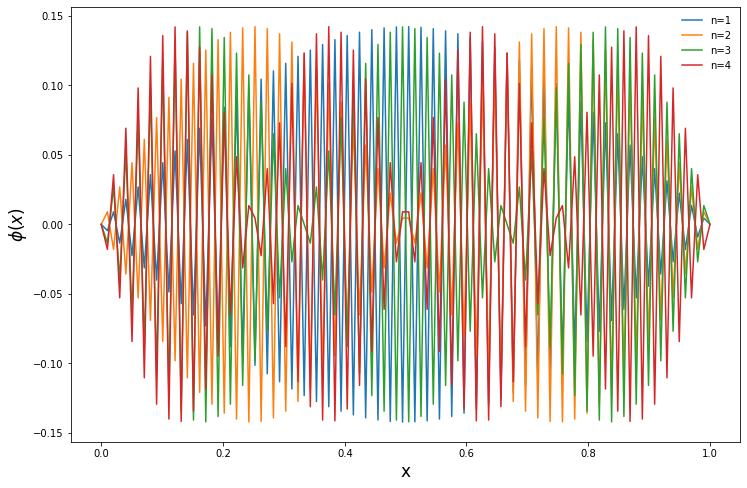

In [40]:
"""
Simulação dos modos normais de vibração de uma corda com extremidades fixas
utilizando o método de diferenças finitas.

Este script resolve numericamente a equação de Helmholtz (resultado da separação
de variáveis da equação de ondas) e plota os três primeiros modos normais
de vibração de uma corda com condições de contorno do tipo Dirichlet: φ(0) = φ(L) = 0.

O operador derivada segunda em relação a x é discretizado por diferenças finitas,
resultando em uma matriz tridiagonal simétrica. Os autovalores desta matriz
correspondem aos quadrados das frequências naturais (ω² / c²), e os autovetores
correspondem aos modos normais (formas de onda estacionárias).

Parâmetros:
-----------
L : Comprimento da corda (domínio espacial: [0, L])
    
N : Número de pontos da malha (incluindo bordas)
    
c : Velocidade de propagação da onda na corda
    
dx : Espaçamento entre os pontos da malha
    
Gráfico contendo os três primeiros modos normais de vibração da corda.
"""

# Parâmetros do problema
L = 1.0       # Comprimento da corda
N = 100       # Número de pontos da malha
c = 1.0       # Velocidade da onda
dx = L / (N - 1)

# Monta a matriz tridiagonal A (NxN, mas descartando os pontos de fronteira)
diagonal = -2.0 * np.ones(N - 2) / dx**2
off_diagonal = 1.0 * np.ones(N - 3) / dx**2
A = np.diag(diagonal) + np.diag(off_diagonal, k=1) + np.diag(off_diagonal, k=-1)

# Resolve o problema de autovalor
lambdas, phis = eigh(A)

# Converte os autovalores em frequências naturais
omegas = np.sqrt(lambdas) * c

# Exibe os três primeiros modos normais
x = np.linspace(0, L, N)
plt.figure(figsize=(12, 8))
for i in range(4):
    phi_full = np.zeros(N)
    phi_full[1:-1] = phis[:, i]  # insere os valores internos, as bordas são 0
    plt.plot(x, phi_full, label=f'n={i+1}')

plt.xlabel("x",size=17)
plt.ylabel(r"$\phi(x)$",size=17)
plt.legend(frameon=False)
plt.show()
